# Final Project - Programming for Data Science

### Collecting Data

- **Content** : This [dataset](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

- **Lisence** : CC0: Public Domain

- **More Information** : The author is provided with data from his professor

In [1]:
# Import necessary library for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data 
df = pd.read_csv("Placement_Data.csv", index_col = 0)
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Exploring Data

##### Number of rows - columns

In [3]:
n_rows, n_cols = df.shape
print('Number of rows = {}'.format(n_rows))
print('Number of columns = {}'.format(n_cols))

Number of rows = 215
Number of columns = 14


#### Check for duplicate rows

In [4]:
print('Number of duplicated rows = {}'.format(df.duplicated().sum()))

Number of duplicated rows = 0


#### The meaning of each column

- **ssc_p** : Secondary Education 10th Grade

- **ssc_b** : 10th Board of Education

- **hsc_p** : Higher Secondary Education 12th Grade

- **hsc_b** : 12th Board of Education

- **hsc_s** : Specialization in Higher Secondary Education

- **degree_p**: Undergraduate 

- **degree_t**: Undergraduate degree type

- **workex**: Work experience

- **etest_p**: Placement test 

- **specialisation**: MBA specialisation

- **mba_p** : MBA 

- **status** : Hiring status

#### Data type of each column

In [5]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

#### Numeric datatype

In [6]:
numerical_df = df.select_dtypes('float64')
numerical_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0
2,79.33,78.33,77.48,86.5,66.28,200000.0
3,65.00,68.00,64.00,75.0,57.80,250000.0
4,56.00,52.00,52.00,66.0,59.43,NaN
5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0
212,58.00,60.00,72.00,74.0,53.62,275000.0
213,67.00,67.00,73.00,59.0,69.72,295000.0


array([[<AxesSubplot:title={'center':'ssc_p'}>,
        <AxesSubplot:title={'center':'hsc_p'}>],
       [<AxesSubplot:title={'center':'degree_p'}>,
        <AxesSubplot:title={'center':'etest_p'}>],
       [<AxesSubplot:title={'center':'mba_p'}>,
        <AxesSubplot:title={'center':'salary'}>]], dtype=object)

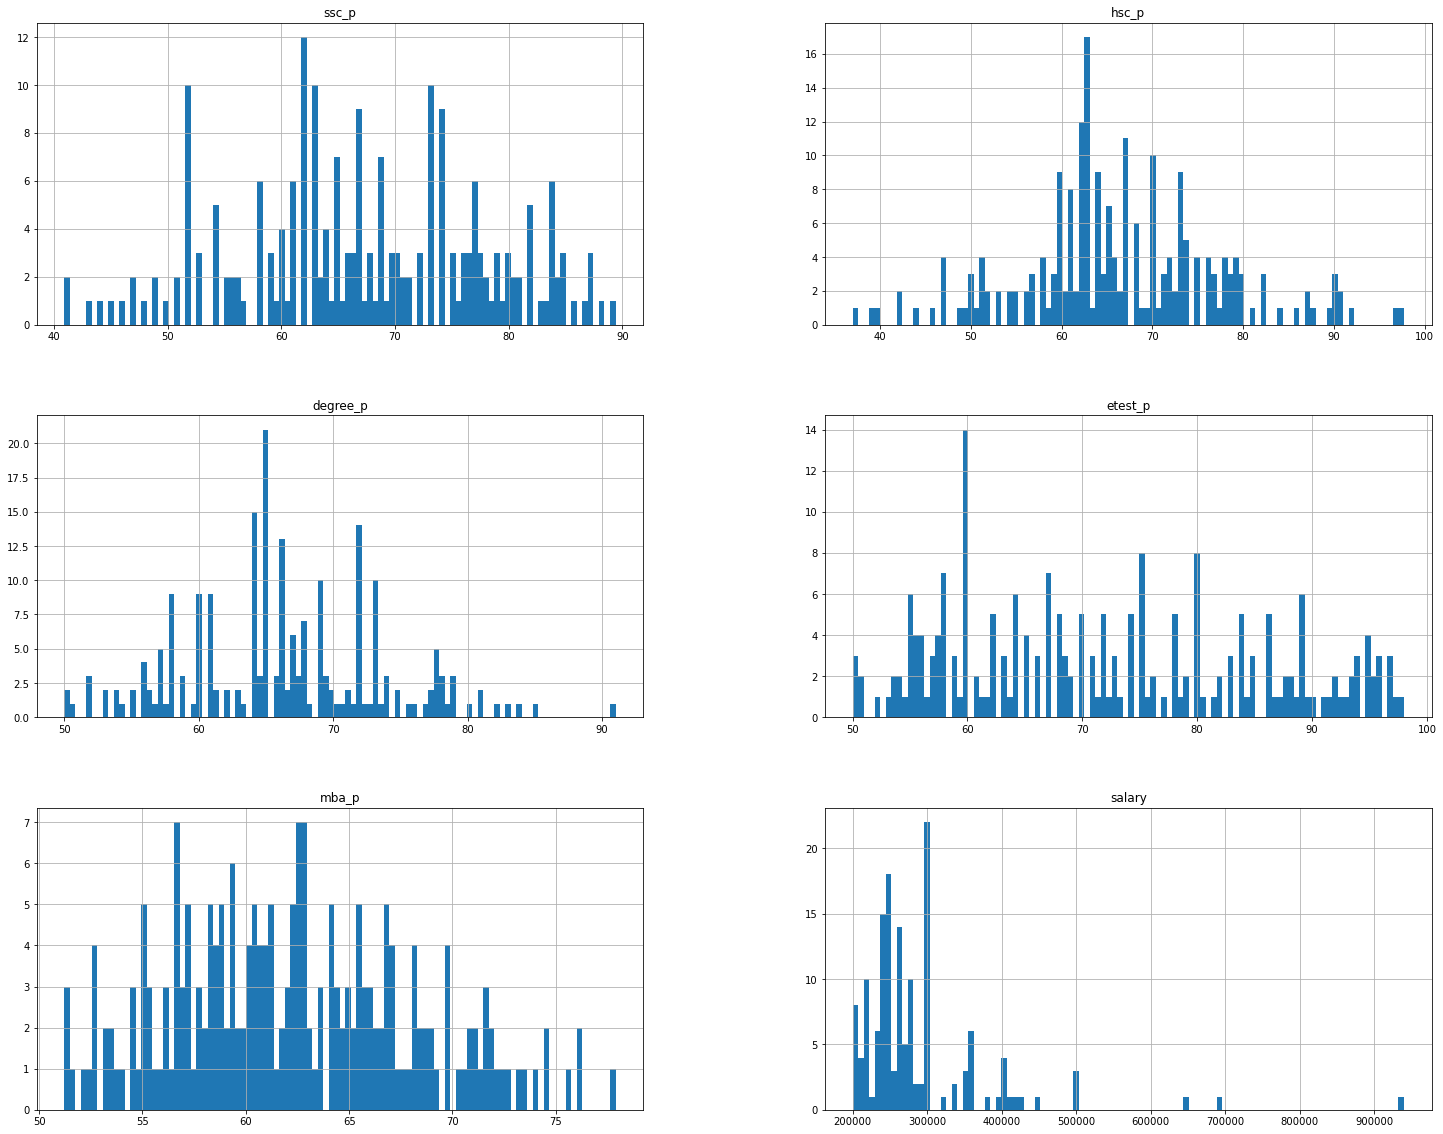

In [7]:
numerical_df.hist(bins = 100, figsize=(25,20))

In [8]:
missing_ratio = round(numerical_df.isnull().sum()/numerical_df.shape[0], 2)
missing_ratio

ssc_p       0.00
hsc_p       0.00
degree_p    0.00
etest_p     0.00
mba_p       0.00
salary      0.31
dtype: float64

In [9]:
# Check condition of the row with empty salary
(df[df['salary'].isna()]['status'] == 'Not Placed').any()

True

***Comment*** : Since all unpaid students are unemployed, it means that no student has a job but no salary information is available. To make it easier to handle, there is a natural way to solve this problem, we will fill all the missing values with the value 0.

In [10]:
# fill all nan value with '0' value and update numerical_df
df.fillna(0, inplace = True)
numerical_df = df.select_dtypes('float64')
numerical_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0
2,79.33,78.33,77.48,86.5,66.28,200000.0
3,65.00,68.00,64.00,75.0,57.80,250000.0
4,56.00,52.00,52.00,66.0,59.43,0.0
5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0
212,58.00,60.00,72.00,74.0,53.62,275000.0
213,67.00,67.00,73.00,59.0,69.72,295000.0


In [11]:
numerical_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


***Comment*** : In the "salary" column, the standard deviation is quite large and the maximum value is much larger than other quantities in the column. The hypothesis to explain this problem can be from the following two reasons: due to the lack of data in the salary column mentioned above and some students receive very high salaries compared to others.

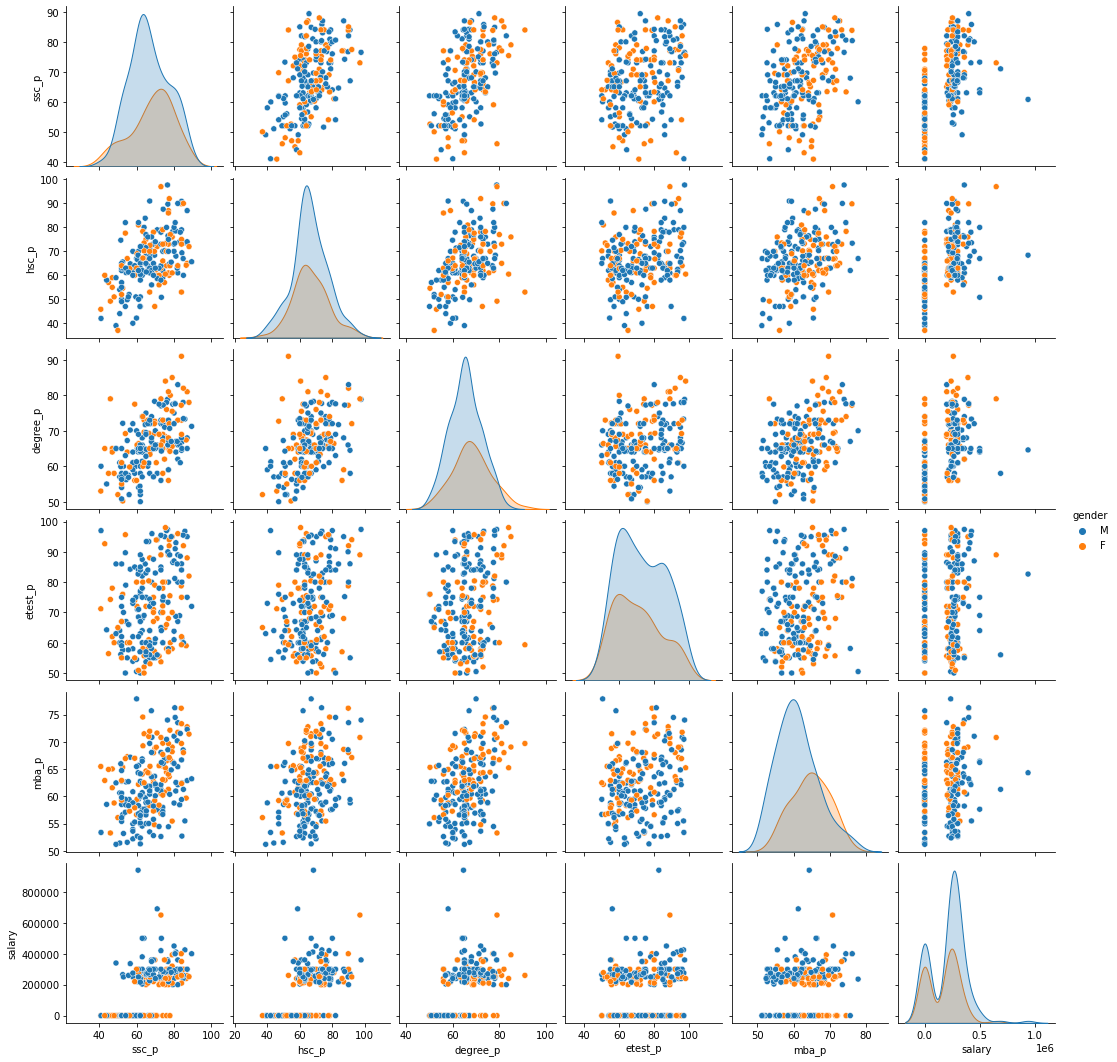

In [12]:
sns.pairplot(df, kind="scatter", hue="gender")

#### Categorical datatype

In [13]:
categorical_df = df.select_dtypes('object')
categorical_df

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


In [14]:
categorical_df.groupby('gender').count()

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
gender,,,,,,,
F,76,76,76,76,76,76,76
M,139,139,139,139,139,139,139


### Question

### Reflection